In [1]:
#instantiate cursor and load libraries
import json
import pandas as pd
import requests
import mysql.connector
import time
import config
import requests
from pandas.io.json import json_normalize

In [2]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.password,
    database = "water")

cursor = cnx.cursor()

In [50]:
nyleaddf = cursor.execute("""SELECT * 
                             FROM water.water_table 
                             JOIN water.counties 
                             ON water_table.MonitoringLocationIdentifier = counties.id 
                             WHERE Contaminant = 'Lead' 
                             AND State = 'New York'
                             ;""")

nyleaddf = pd.DataFrame(cursor.fetchall())

nyleaddf.columns = [x[0] for x in cursor.description]

In [54]:
nyleaddf

,ActivityIdentifier,MonitoringLocationIdentifier,AnalysisStartDate,Contaminant,DetectedLevel,LevelUnit,ActivityMediaSubdivisionName,LatitudeMeasure,LongitudeMeasure,id,County,State
0,nwisnv.01.01800230,USGS-351218115385901,2018-03-15,Lead,0.051,ug/l,Surface Water,35.2051,-115.6500,USGS-351218115385901,Oneida County,New York
1,nwisnv.01.01800395,USGS-363214116133701,2018-05-11,Lead,0.230,ug/l,Groundwater,36.5372,-116.2280,USGS-363214116133701,Oneida County,New York
2,nwisnv.01.01800396,USGS-363214116133701,2018-05-11,Lead,0.158,ug/l,Groundwater,36.5372,-116.2280,USGS-363214116133701,Oneida County,New York
3,nwisnv.01.01800397,USGS-363214116133701,2018-05-11,Lead,0.239,ug/l,Groundwater,36.5372,-116.2280,USGS-363214116133701,Oneida County,New York
4,nwisnv.01.01800398,USGS-363214116133701,2018-05-19,Lead,0.438,ug/l,Groundwater,36.5372,-116.2280,USGS-363214116133701,Oneida County,New York
5,nwisnv.01.01800399,USGS-363214116133701,2018-05-11,Lead,0.387,ug/l,Groundwater,36.5372,-116.2280,USGS-363214116133701,Oneida County,New York
6,nwisnv.01.01800400,USGS-363214116133701,2018-05-11,Lead,0.437,ug/l,Groundwater,36.5372,-116.2280,USGS-363214116133701,Oneida County,New York
7,nwisnv.01.01800401,USGS-363214116133701,2018-05-11,Lead,0.376,ug/l,Groundwater,36.5372,-116.2280,USGS-363214116133701,Oneida County,New York
8,nwisnv.01.01800402,USGS-363214116133701,2018-05-11,Lead,0.221,ug/l,Groundwater,36.5372,-116.2280,USGS-363214116133701,Oneida County,New York
9,nwisnv.01.01900016,USGS-363214116133701,2018-10-29,Lead,0.032,ug/l,Groundwater,36.5372,-116.2280,USGS-363214116133701,Oneida County,New York


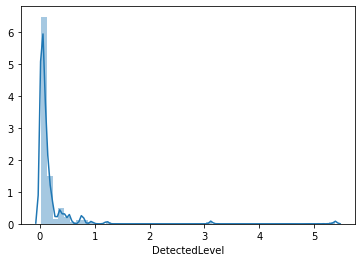

In [53]:
sns.distplot(nyleaddf.DetectedLevel)

In [42]:

leaddf = cursor.execute("""SELECT * FROM water.water_table WHERE water_table.Contaminant = 'Lead' AND water_table.DetectedLevel = 27000;""")

leaddf = pd.DataFrame(cursor.fetchall())

leaddf.columns = [x[0] for x in cursor.description]

In [49]:
leaddf.mean()

DetectedLevel        0.185341
LatitudeMeasure     42.037606
LongitudeMeasure   -82.507426
dtype: float64

In [ ]:
leaddf

In [43]:
pd.DataFrame(leaddf.DetectedLevel.describe())

,DetectedLevel
count,1.0
mean,27000.0
std,NaN
min,27000.0
25%,27000.0
50%,27000.0
75%,27000.0
max,27000.0


In [31]:
leaddf.DetectedLevel.mean()

1.27056043332913

In [32]:
leaddf.DetectedLevel.std()

2.1883990481258184

In [33]:
import seaborn as sns

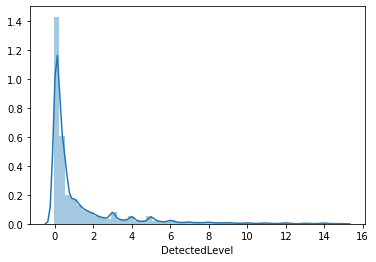

In [34]:
sns.distplot(leaddf.DetectedLevel)

In [29]:
# Import necessary modules 
from __future__ import print_function, division
import numpy as np

# Import SciPy stats and matplotlib for calculating and visualising effect size
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline


# Create map using Geopy

In [17]:
conda install geopandas

Solving environment: failed with current_repodata.json, will retry with next repodata source.
Initial quick solve with frozen env failed.  Unfreezing env and trying again.
Solving environment: failed with current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/cblessen/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    click-plugins-1.1.1        |             py_0          11 KB
    cligj-0.5.0                |           py37_0          12 KB
    conda-4.7.12               |           py37_0         3.0 MB
    descartes-1.1.0            |             py_3           9 KB
    fiona-1.8.4                |   py37h9a122fd_0         642 KB
    fontconfig-2.13.0          |       h5d5b041_1         2

In [18]:
conda install bokeh

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2019.07=py37_0
  - defaults/osx-64::numba==0.44.1=py37h6440ff4_0
done

## Package Plan ##

  environment location: /Users/cblessen/anaconda3

  added / updated specs:
    - bokeh


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           6 KB
    anaconda-custom            |           py37_1           3 KB
    bokeh-1.4.0                |           py37_0        13.6 MB
    ca-certificates-2019.10.16 |                0         131 KB
    certifi-2019.9.11          |           py37_0         154 KB
    openssl-1.1.1d             |       h1de35cc_3         3.4 MB
    tbb-2019.8                 |       h04f5b5a_0         149 KB
    ---------------------------------

In [19]:
# Import geopandas package
import geopandas as gpd
# Read in shapefile and examine data
contiguous_usa = gpd.read_file('/Users/cblessen/Documents/FlatironSchool/Projects/Water/WaterQualityProject2/cb_2018_us_county_20m.shp')
contiguous_usa.head()

DriverError: Unable to open /Users/cblessen/Documents/FlatironSchool/Projects/Water/WaterQualityProject2/cb_2018_us_county_20m.shx or /Users/cblessen/Documents/FlatironSchool/Projects/Water/WaterQualityProject2/cb_2018_us_county_20m.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [21]:
SHAPE_RESTORE_SHX=YES fio info myshapefile.shp

SyntaxError: invalid syntax (<ipython-input-21-56828b4f3267>, line 1)

In [ ]:
str(contiguous_usa.iloc[0]['geometry'])

In [ ]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = pop_states.to_json())

In [ ]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40000000)
# Define custom tick labels for color bar.
tick_labels = {‘0’: ‘0’, ‘5000000’: ‘5,000,000’,
 ‘10000000’:’10,000,000', ‘15000000’:’15,000,000',
 ‘20000000’:’20,000,000', ‘25000000’:’25,000,000',
 ‘30000000’:’30,000,000', ‘35000000’:’35,000,000',
 ‘40000000’:’40,000,000+’}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = ‘horizontal’,
                     major_label_overrides = tick_labels)
# Create figure object.
p = figure(title = ‘Lead Levels in Water Samples, 2018’, 
           plot_height = 600, plot_width = 950, 
           toolbar_location = ‘below’,
           tools = “pan, wheel_zoom, box_zoom, reset”)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p.patches(‘xs’,’ys’, source = geosource,
                   fill_color = {‘field’ :'POPESTIMATE2018',
                                 ‘transform’ : color_mapper},
                   line_color = ‘gray’, 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [(‘State’,’@NAME’),
                               (‘Population’, ‘@POPESTIMATE2018’)]))
# Specify layout
# p.add_layout(color_bar, ‘below’)
show(p)

In [ ]:
lead_sites = lead_per_l.merge(sites_no_dup,
                          left_on = ‘MonitoringLocationIdentifier’,
                          right_on = ‘MonitoringLocationIdentifier’)
lead_sites_sorted = lead_sites.sort_values(by = ‘ActivityStartDate’)
# After dropping duplicates by date, 12,249 data points
lead_sites_dropdup = lead_sites_sorted.drop_duplicates(subset = [‘MonitoringLocationIdentifier’, ‘ActivityStartDate’], keep = ‘last’).reset_index(drop = True)
# Drop data points not in the contiguous USA, 10,341 data points
lead_sites_dropdup = lead_sites_dropdup[(lead_sites_dropdup[‘LongitudeMeasure’] <= -60) 
                 & (lead_sites_dropdup[‘LongitudeMeasure’] >= -130)
                 & (lead_sites_dropdup[‘LatitudeMeasure’] <= 50) 
                 & (lead_sites_dropdup[‘LatitudeMeasure’] >= 20)]
# Create Month column for plotting Slider
lead_sites_dropdup[‘Month’] = [int(x.split(‘-’)[1]) for x in lead_sites_dropdup[‘ActivityStartDate’]]
# Create shapely.Point objects based on longitude and latitude
geometry = []
for index, row in lead_sites_dropdup.iterrows():
    geometry.append(Point(row[‘LongitudeMeasure’], 
                          row[‘LatitudeMeasure’]))
lead_sites_contig = lead_sites_dropdup.copy()
lead_sites_contig[‘geometry’] = geometry